 # Final Project.  Product Range Analysis

 Presentation link: https://disk.yandex.ru/i/xYj5sxXPJngjtA

# Project description

According to the terms of the task, we are going to make a product range analysis in an online store that sells household goods. We have compiled the dataset with the transaction history. 

The goal is to gain insights into the store's product range, understand customer preferences, and identify any significant patterns and relationships within the data. This analysis can help to inventory management make business decisions related with marketing strategies, and product development.

Stakeholders such as store managers, marketing teams, and product development teams would be interested in the analysis results to make informed decisions regarding the product range.

Decisions related to product assortment, pricing strategies, promotional activities, and potential expansion or diversification of the product range may be made based on the analysis findings. To analyze the store's product range, we can follow a step-by-step approach that includes exploratory data analysis, analyzing the product range, and formulating and testing statistical hypotheses.


**Steps of the analysis**
- Data preprocessing
- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses
- Conclusions and recomendations


**1. Data Preprocessing**:
Gather relevant data on the store's products, including attributes such as categories, prices, descriptions, etc.
Check for missing values and handle them appropriately (imputation if possible or removal) in columns CustomerID, StockCode, and Description.
Clean the data by addressing any duplicates or inconsistencies.
Convert data types if necessary.
Perform any additional data cleaning or transformations as needed.

**2. Exploratory Data Analysis (EDA):**
Explore the distribution of Quantity and UnitPrice variables to identify any outliers or unusual patterns.
Analyze the InvoiceDate column to understand the timeframe and seasonality of the data.
Investigate the distribution of StockCode and Description to identify the variety and diversity of products.
Calculate descriptive statistics for key variables, such as the average unit price, quantity sold.
Visualize the data using appropriate charts and graphs to identify patterns or outliers.


**3. Market Basket Analysis:**
Extract transaction data, focusing on the InvoiceNo, StockCode, and Description columns.  Calculate metrics such as most selling products. Categorize items and define the most popular.

**4. Product Performance Analysis:**
Analyze the sales performance of individual products using the StockCode and Description columns.
Calculate revenue, and sales growth.
Identify the top-selling products based on revenue generated and compare it with quantity sold top.


**5. Hypothesis Formulation and Testing:**
Based on the analysis, propose hypotheses related to the product range, such as a correlation between product category sales volume and the total revenue.
H0: There is no significant correlation between the product category sales volume and the total revenue.
H1: There is a significant correlation between the product category sales volume and the total revenue.
Statistical Testing:
Choose appropriate statistical tests based on the hypotheses.
Set the significance level (alpha) to determine the threshold for accepting or rejecting the null hypothesis. Typically, alpha is set to 0.05 (5%). Interpret the p-value associated with the test and determine whether the null hypothesis can be rejected or not.

**Conclusion and Recomendations:**
Summarize the findings from the statistical tests, including the interpretation of p-values and significance.
Present the results using visualizations, tables, or other suitable formats.
Make recommendations or suggestions based on the analysis to inform decision-making processes. Prepare a comprehensive presentation, including the methodology, results, and conclusions.


# Load the libraries

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st

# Load the data

In [2]:
df=pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


We have the the following data:

InvoiceNo - order id

StockCode - item id

Description - item name

Quantity - quantity of items in the invoice

InvoiceDate - invoice date

UnitPrice - price per item

CustomerID- identifier of the customer


In [3]:
#the general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


We should change the type of InvoiceDate column to date time type. We see missing values in Description and CustomerID.

# Data preprocessing

In [4]:
# Change InvoiceDate column to date time type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
#Drop CustomerID column
df=df.drop('CustomerID', axis= 1)
#the column names to lower case
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.8+ MB


 in "description" column there is 1454 missing values, but we have no any missing values in StockCode column. Every item has a stock code, so we can set a description according to this stock fild, and if there is no match, we can fill it with text "No discription".  

In [5]:
def Description(x):
    if x.empty:
        return 'No description'
    else:
        value_counts = x.value_counts()
        if len(value_counts) > 0:
            return value_counts.index[0]
        else:
            return 'no description'

desc_dictionary = df.groupby('stockcode')['description'].apply(Description).to_dict()

# Replacing missing values in `description` column with the values from desc_dict
df['description'] = df.apply(lambda x: desc_dictionary[x['stockcode']], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  541909 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 24.8+ MB


In [6]:
# Check the values with no description
no_discription=df.query('description=="no description"')
no_discription.head(25)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice
1970,536545,21134,no description,1,2018-11-29 14:32:00,0.0
1987,536549,85226A,no description,1,2018-11-29 14:34:00,0.0
1988,536550,85044,no description,1,2018-11-29 14:34:00,0.0
2024,536552,20950,no description,1,2018-11-29 14:34:00,0.0
2026,536554,84670,no description,23,2018-11-29 14:35:00,0.0
7187,536995,35951,no description,57,2018-12-01 15:29:00,0.0
7193,537001,21653,no description,-6,2018-12-01 15:33:00,0.0
19628,537875,20849,no description,1,2018-12-06 18:08:00,0.0
19631,537878,72803B,no description,1,2018-12-06 18:09:00,0.0
21782,538133,85018C,no description,3,2018-12-07 15:56:00,0.0


In [7]:

#As we have quantity >0, let's have a look at thease orders
order1=df.query('description=="no description" and quantity >0').shape[0]
order1

15

In [8]:
# We have only 15 with negative quantity
order1=df.query('description=="no description" and quantity >0')

order1.head(15)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice
1970,536545,21134,no description,1,2018-11-29 14:32:00,0.0
1987,536549,85226A,no description,1,2018-11-29 14:34:00,0.0
1988,536550,85044,no description,1,2018-11-29 14:34:00,0.0
2024,536552,20950,no description,1,2018-11-29 14:34:00,0.0
2026,536554,84670,no description,23,2018-11-29 14:35:00,0.0
7187,536995,35951,no description,57,2018-12-01 15:29:00,0.0
19628,537875,20849,no description,1,2018-12-06 18:08:00,0.0
19631,537878,72803B,no description,1,2018-12-06 18:09:00,0.0
21782,538133,85018C,no description,3,2018-12-07 15:56:00,0.0
21786,538137,62095B,no description,2,2018-12-07 15:57:00,0.0


In [9]:
#As we have quantity >0, let's have a look at thease orders
order2=df.query('description=="no description" and quantity <0').shape[0]
order2

97

In [10]:
order2=df.query('description=="no description" and quantity <0')
order2.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice
7193,537001,21653,no description,-6,2018-12-01 15:33:00,0.0
23764,538241,21431,no description,-21,2018-12-08 12:00:00,0.0
50808,540560,21589,no description,-14,2019-01-08 10:08:00,0.0
52094,540683,84546,no description,-45,2019-01-08 17:00:00,0.0
55319,540987,17011A,no description,-61,2019-01-10 16:15:00,0.0


In [11]:
#unitprices not 0: 

df.query('description=="no description" and unitprice ==0').shape[0]

112

We see that all the 'no description' have zero prices. May thease invoice rows will not affect to the futher analysis.

In [12]:
#Change description rows to lowercase
df['description']=df['description'].str.lower()
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39
...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15


At the step of Data Preprocessing we gathered relevant data on the store's products descriptions. Checked for missing values and handle them. Converted data types and column names. 

#  Exploratory Data Analysis (EDA)

Pricing. Let's look at the distribution of unit_price column


In [13]:
df.unitprice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: unitprice, dtype: float64

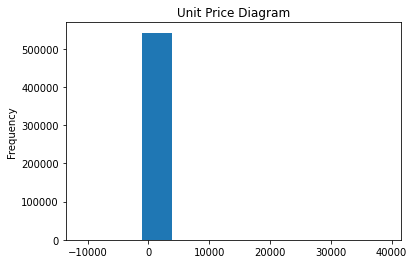

In [14]:
df['unitprice'].plot.hist(bins=10)
plt.title('Unit Price Diagram')
plt.show()

Judging by the diagram and the description, this store sells mainly inexpensive mass market goods. The mean price is 4.6 USD and 75% are not more than 4.1 USD. It looks like we need to investigate the prices more detail, as significant outliers are visible. We can decompose unit prices into two parts:

1 and 99 percentiles.

In [15]:
print(f'''Less than 1% of the unit price is less than {np.percentile(df.unitprice, 1)},
Less than 1% of the unit price is more than {np.percentile(df.unitprice, 99)}.''')

Less than 1% of the unit price is less than 0.19,
Less than 1% of the unit price is more than 18.0.


We should decside later what to do with anomal unit prices higher than 18.0 and lower 0.19

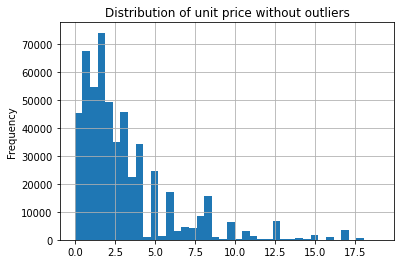

In [16]:
# Building filtered hustogram of `unit_price`
df['unitprice'].plot.hist(bins=40, range=(0, 19))
plt.title('Distribution of unit price without outliers')
plt.grid()
plt.show()

Obviously, the distribution is skewed to the right.

*Quantity. Let's look at the distribution of quantity column*


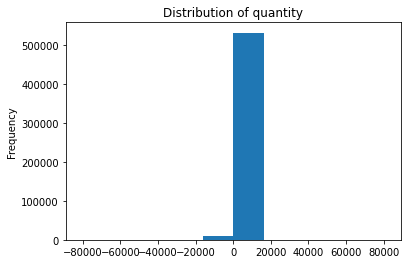

In [17]:
#quantity distribution diagram
df['quantity'].plot.hist(bins=10)
plt.title('Distribution of quantity')
plt.show()

In [18]:
#Let's find the range of usual quantity of order with percentiles analysis:
print(f'''Less than 1% of the items have a quantuty less than {np.percentile(df.quantity, 1)},
Less than 1% of the items have a quantity more than than {np.percentile(df.quantity, 99)}.''')

Less than 1% of the items have a quantuty less than -2.0,
Less than 1% of the items have a quantity more than than 100.0.


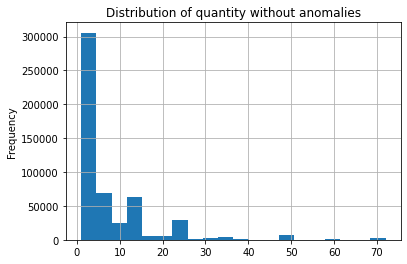

In [19]:
# histogram for quantity column inside the range without anomalies
df['quantity'].plot.hist(bins=20, range=(1, 72))
plt.title('Distribution of quantity without anomalies')
plt.grid()
plt.show()

In [20]:
df.quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: quantity, dtype: float64


As we see, the range of quantity is 1-10 items/in one order. So we are dealing with small retail store. The half of orders is 1-3 items and the mean is shifted due to anomalous orders. Let's look at the filtered dataframe without outliers. 

In [21]:
filter_df=df.query('0.19<=unitprice<=18 and -2<=quantity <=100')
filter_df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39
...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15


In [22]:
filter_df.describe()

,quantity,unitprice
count,524935.000000,524935.000000
mean,7.850522,3.156049
std,12.453573,3.012596
min,-2.000000,0.190000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,100.000000,18.000000


Compared to the original dataframe we have thrown out 16974 rows(3.1% of data), but this data describes better the real patterns of purchases.

*Invoicing. Let's look at the distribution of invoice date column*


In [23]:
filter_df.invoicedate.describe()

/tmp/ipykernel_67/3197381769.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  filter_df.invoicedate.describe()


count                  524935
unique                  20142
top       2019-10-29 14:41:00
freq                     1092
first     2018-11-29 08:26:00
last      2019-12-07 12:50:00
Name: invoicedate, dtype: object

Our dataframe includes  information of 1 year and 9 days of purchases.So the most illustrative will be visualization of orders grouped by month. We will be able to see trends and extremes.

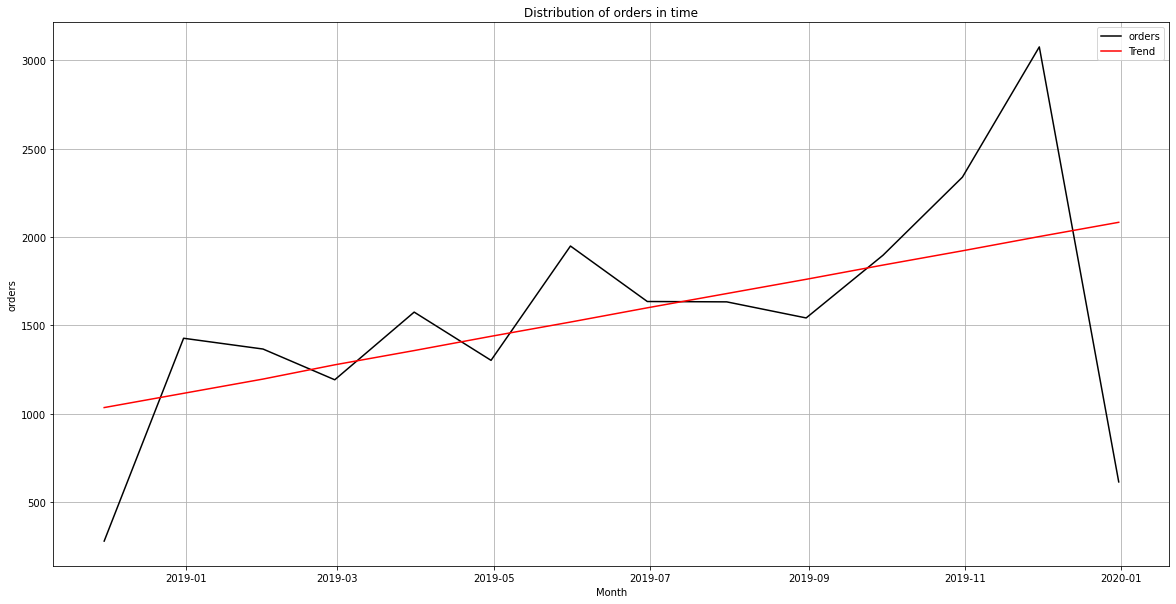

In [24]:
# Group orders by month
order_month = filter_df.resample('M', on='invoicedate')['invoiceno'].nunique()

# Create line plot
plt.figure(figsize=(20, 10))
plt.plot(order_month.index, order_month.values, label='orders', color='black')
plt.xlabel('Month')
plt.ylabel('orders')
plt.title('Distribution of orders in time')
plt.xticks()
plt.grid()

#trend line
x = np.arange(len(order_month))
y = order_month.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(order_month.index, p(x), color='red', linestyle='-', label='Trend')
plt.legend()

plt.show()

E-commerce is characterizead by seasonal peak demand in November-December and decline in January-February. In general we have a positive trend during all the period.

*Variety and diversity of products. Let's investigate the distribution of StockCode and Description.*

In [25]:
#Calculate our product matrix 
product = filter_df.groupby('stockcode')['description'].nunique().reset_index()
product.shape[0]

3890

In [26]:
product.describe()

,description
count,3890.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


As we have one description for each product,so we can index our goods by description.

During this step we explored the distribution of Quantity and UnitPrice variables and identified outliers, filtered unusual patterns. We analyzed the InvoiceDate column and revealed the seasonality of the data and positive trend. Calculated descriptive statistics for key variables, such as the average unit price, quantity sold. Visualized the data using appropriate charts and graphs to identify patterns and outliers.
Investigate the distribution of StockCode and Description to identify the variety and diversity of products. 


# Market Basket Analysis

In [27]:
#Product's rating 
products_r= (filter_df.groupby(['stockcode', 'description']).size().reset_index(name='count').
             sort_values(by='count', ascending=False))

# Print the top 50
products_r.head(50)

,stockcode,description,count
3378,85123A,white hanging heart t-light holder,2253
3358,85099B,jumbo bag red retrospot,2074
1298,22423,regency cakestand 3 tier,1876
2644,47566,party bunting,1696
169,20725,lunch bag red retrospot,1618
1579,22720,set of 3 cake tins pantry design,1454
3165,84879,assorted colour bird ornament,1437
1097,22197,popcorn holder,1406
1264,22383,lunch bag suki design,1339
171,20727,lunch bag black skull.,1339


In [28]:
products_r.describe()

,count
count,3890.000000
mean,134.944730
std,197.090905
min,1.000000
25%,16.000000
50%,65.000000
75%,169.000000
max,2253.000000


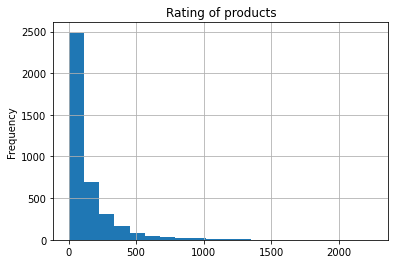

In [29]:
# Vizualise the rating on histogram
products_r['count'].plot.hist(bins=20)
plt.title('Rating of products')
plt.grid()
plt.show()

Our histogram is skewed to the right.

We have most selling top 30 products, with sales not less than 1000 items.The most part of product's matrix we sold very rarely, the 75% less than 169 times a year. So most of the warehouse is held only for assortment and it's not a big problem if we only have thease positions virtually on the site, and do not store them.

*Earlier we found out that each StockCode has a unique description, so now let's categorize our items by the description.*

In [30]:
keyword_category= {
    
    'delivery':['post', 'postage'],
    'electronics': ['electronic', 'gadget', 'device', 'computer', 
                    'mobile', 'audio', 'video', 'camera', 'console'],
    'fashion': ['bag','shopper','fashion', 'apparel', 'clothing', 'shoes', 'footwear', 'bag', 'jewelry', 'watches'],
    'home': ['flower','dish','photoframe','bottle','light','vintage','frame','card','spot','ceramic','cake','cakestand','bunting','glass','lantern','clock','ribbons','home','garden', 'kitchen', 'napkins','furniture', 'decor', 'bedding',
             ' light holder', 't-light', 'holder','ornament','chalkboard','wicker','jar','chain','jam','teacup','box','picture','mould'],
    'beauty': ['soap','beauty', 'cosmetics', 'care', 'makeup', 'bath', 'fragrances'],
    'books': ['books', 'literature', 'reading', 'novels', 'fiction', 'periodical', 'magazine'],
    'music': ['music', 'tv', 'movie', 'album'],
    'toys': ['toys', 'games', 'play', 'children'],
    'health': ['health', 'wellness', 'supplement', 'fitness', 'hygiene'],
    'vehicle': ['automotive', 'car', 'vehicle', 'parts', 'components', 'tires',  'wheels', 'maintenance']
    
}

In [31]:
#Function to assign a description to category
def to_category(description):
    for category, keywords in keyword_category.items():
        for keyword in keywords:
            if keyword in description:
                return category
    return 'other'  # Default category if no match is found




Let's apply the function to description column and add a new 'category' column

In [32]:
# Apply the function+category column to the dataframe
products_r['category'] = products_r['description'].apply(to_category)

products_r.head(30)

,stockcode,description,count,category
3378,85123A,white hanging heart t-light holder,2253,home
3358,85099B,jumbo bag red retrospot,2074,fashion
1298,22423,regency cakestand 3 tier,1876,home
2644,47566,party bunting,1696,home
169,20725,lunch bag red retrospot,1618,fashion
1579,22720,set of 3 cake tins pantry design,1454,home
3165,84879,assorted colour bird ornament,1437,home
1097,22197,popcorn holder,1406,home
1264,22383,lunch bag suki design,1339,fashion
171,20727,lunch bag black skull.,1339,fashion


In [33]:
products_r.tail(10)

,stockcode,description,count,category
3377,85119,watering can single hook pistachio,1,other
3366,85109,pink boudoir t-light holder,1,home
614,21491,set of three vintage gift wraps,1,home
3357,85098B,blue flying singing canary,1,other
562,21410,country cottage doorstop green,1,other
565,21414,scallop shell soap dish,1,home
3341,85068,cream sweetheart shelf + hooks,1,other
3340,85067,cream sweetheart wall cabinet,1,other
3338,85065,cream sweetheart trays,1,other
3889,m,manual,1,other


In [34]:
products_r.category.value_counts()

other          1991
home           1589
fashion         192
toys             32
vehicle          25
beauty           18
music            13
delivery         11
electronics      11
books             8
Name: category, dtype: int64

Now let's visualize the top selling items:

In [35]:
# Group by categories
categories = products_r.groupby('category')['stockcode'].count().sort_values(ascending=False).reset_index()

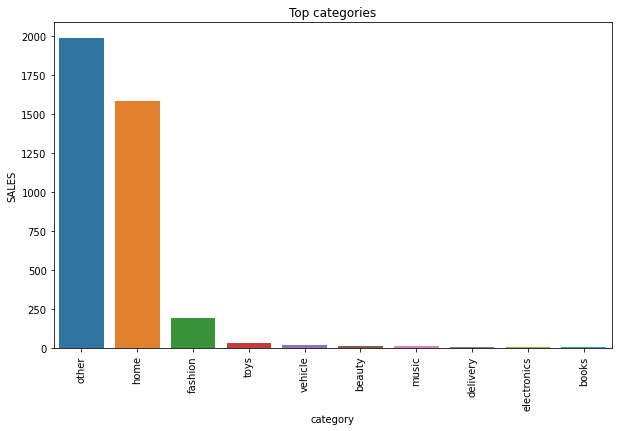

In [36]:
#Bar plot for vizualization
plt.figure(figsize = (10,6))
sns.barplot(data=categories, x='category', y='stockcode')
plt.title('Top categories')
plt.ylabel('SALES')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

Obviously, it's a home goods store with a specialization on kitchen, cooking and party catering. Items in 'Other' category are connected in one way or another to kitchen accessories.

# Product Performance Analysis

Analyzing the sales performance, let's find the revenue for product matrix.

In [37]:
filter_df['revenue'] = filter_df['unitprice'] * filter_df['quantity']

filter_df

/tmp/ipykernel_67/239040977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['revenue'] = filter_df['unitprice'] * filter_df['quantity']


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,revenue
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,15.30
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,20.34
...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85,10.20
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10,12.60
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15,16.60
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15,16.60


We assign a value of revenue to each invoice. Now let's make a rating of products by recived revenue 

In [38]:
#Product's revenue rating 
products_rr= filter_df.groupby('description')['revenue'].sum().sort_values(ascending = False).reset_index().head(30)

# Print the top 30
products_rr.head(30)

,description,revenue
0,regency cakestand 3 tier,126145.52
1,party bunting,87680.30
2,white hanging heart t-light holder,69992.89
3,jumbo bag red retrospot,64711.88
4,paper chain kit 50's christmas,45451.96
5,chilli lights,44052.02
6,postage,41501.41
7,assorted colour bird ornament,39137.20
8,spotty bunting,38187.18
9,lunch bag red retrospot,34609.61


We vizualise it on a graph.

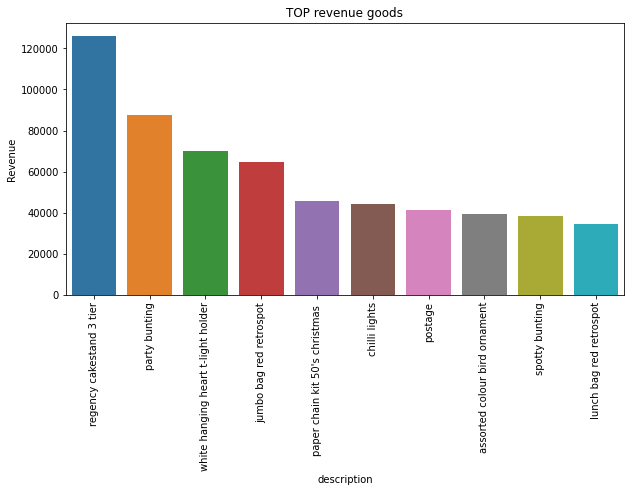

In [39]:
# Plot a graph
products_rr= filter_df.groupby('description')['revenue'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,5))
sns.barplot(data=products_rr, x='description', y='revenue')
plt.title('TOP revenue goods')
plt.ylabel('Revenue')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

In [40]:
# Group products by the quantity
products_qr =filter_df.groupby('description')['quantity'].sum().sort_values(ascending = False).reset_index().head(50)

products_qr

,description,quantity
0,jumbo bag red retrospot,31919
1,popcorn holder,27860
2,white hanging heart t-light holder,24619
3,assorted colour bird ornament,22776
4,world war 2 gliders asstd designs,22023
5,pack of 72 retrospot cake cases,19050
6,victorian glass hanging t-light,18962
7,lunch bag red retrospot,18569
8,antique silver t-light glass,16194
9,party bunting,16058


We vizualise the rating on a graph.

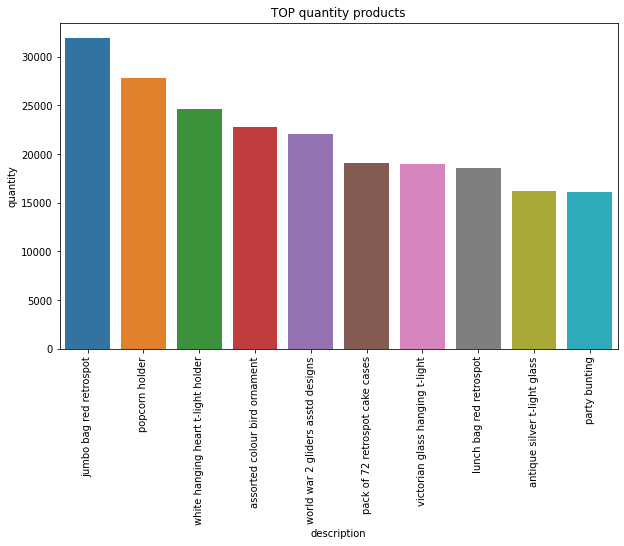

In [41]:
# Plotting a bar graph
products_qr =filter_df.groupby('description')['quantity'].sum().sort_values(ascending = False).reset_index().head(10)
plt.figure(figsize = (10,6))
sns.barplot(data=products_qr, x='description', y='quantity')
plt.title('TOP quantity products')
plt.ylabel('quantity')
plt.tick_params(axis='x', labelrotation=90)
plt.show()

Our top- revenue product is REGENCY CAKESTAND 3 TIER (revenue 126145.52). it is on the 31rd place in the quantity rating (10872). TOP quantity product is JUMBO BAG RED RETROSPOT (total quantity 31919) and it is on the 4th place (revenue 64711.88) in the revenue TOP.

*Let's check the sales growth in time*

In [42]:
# Group revenue by month
revenue_month = filter_df.resample('M', on='invoicedate')['revenue'].sum()

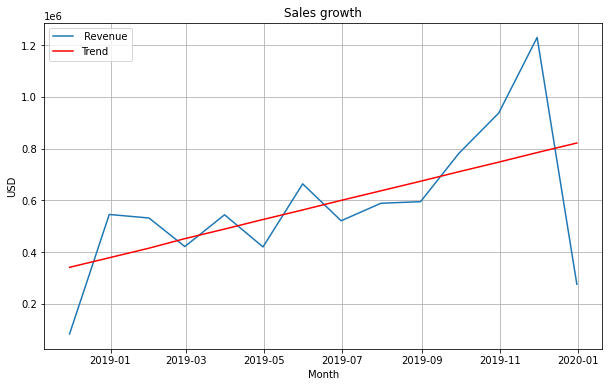

In [43]:
# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(revenue_month.index, revenue_month.values, label=' Revenue')
plt.xlabel('Month')
plt.ylabel('USD')
plt.title('Sales growth')
plt.xticks()
plt.grid()

#trend line
x = np.arange(len(revenue_month))
y = revenue_month.values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(revenue_month.index, p(x), color='red', linestyle='-', label='Trend')
plt.legend()

plt.show()

As this graph shows, we have the same positive trend in orders number and in total revenue by month.

# Hypothesis Formulation and Testing

Let's formulate a hypothesises and check it statiscically. There is a correlation between product category sales volume and the total revenue.

H0: There is no significant correlation between the product category sales volume and the total revenue.

H1: There is significant correlation between the product category sales volume and the total revenue.

In [45]:
# Make a dataframe with total revenue and total quantity grouped by categories.
filter_df['category'] = filter_df['description'].apply(to_category)
categories_r = filter_df.groupby('category').agg({'quantity':'sum', 'revenue':'sum'}).reset_index()
categories_r.sort_values(by='revenue', ascending=False).style.format({'revenue': '{:.2f}'})

/tmp/ipykernel_67/1441153624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['category'] = filter_df['description'].apply(to_category)


,category,quantity,revenue
5,home,1915642,4183420.43
7,other,1587367,2735004.94
4,fashion,521772,971610.01
8,toys,41457,109259.51
2,delivery,11144,50450.14
0,beauty,16348,31403.50
1,books,12583,27196.68
9,vehicle,5129,11216.69
6,music,4950,10724.33
3,electronics,4622,6920.32


In [46]:
# calcilating correlation table
categories_r.corr()

,quantity,revenue
quantity,1.000000,0.991609
revenue,0.991609,1.000000


We see a correlation between categories sales and total revenue about 99%. The most popular categories bring us the higher revenue. For check it statisticly we will use statistical significance parameter alpha 0.05 and calculate Pearson correlation coefficient. 

In [47]:
#Pearson correlation coefficient
corr, p_val = st.pearsonr(categories_r['quantity'], categories_r['revenue'])

print(f"Pearson correlation coefficient: {corr:.3f}")

#statistical check
alpha = 0.05
if p_val < alpha:
    print(f'''There is significant correlation between the product category sales volume and the total revenue.
p-value is: {p_val:.3f}
We reject null hypothesis.''')
else:
    print(f'''There are no significant correlation between the product category sales volume and the total revenue.
p-value is: {p_val:.3f}
We can not reject null hypothesis.''')

Pearson correlation coefficient: 0.992
There is significant correlation between the product category sales volume and the total revenue.
p-value is: 0.000
We reject null hypothesis.


From the statistical point of view the correlation is significant. We reject H0 hipothesis.

# Conclusion and Recomendations
Summarize the findings from the statistical tests, including the interpretation of p-values and significance.
Present the results using visualizations, tables, or other suitable formats.
Make recommendations or suggestions based on the analysis to inform decision-making processes. Prepare a comprehensive presentation, including the methodology, results, and conclusions.

We started to analyse the dataframe 'ecommerce_dataset_us.csv'. First of all we preprocess the data: changed InvoiceDate column to date time type, dropped CustomersID column, managed Description column 1454 missing values and changed description rows to lowercase.

In explotary analysis step we checked the distribution of unit price. The mean price is 4.6 USD and 75% are not more than 4.1 USD. We can decompose unit prices and saw that less than 1% of the unit price is less than 0.19, and less than 1% of the unit price is more than 18.0.

We checked the distribution of quantity and less than 1% of the items have a quantuty less than -2.0, less than 1% of the items have a quantity more than than 100.0. To avoid anomalies that distort the output, we decided to filter the outliers. Compared to the original dataframe we have thrown out 16974 rows(3.1% of data), and the new dataframe describes better the real patterns of purchases.

Looking at the distribution of invoice date we define that our dataframe includes information of 1 year.So the most illustrative will be visualization of orders grouped by month. We will be able to see trends and extremes. On the graph is visible seasonal peak demand in November-December and decline in January-February. In general we have a positive trend during all the studing period.

As we have 3890 StockCode and one description for each product,so we can index our goods by description. That will help to understand better what kond of goods we are selling.

During this step we explored the distribution of Quantity and UnitPrice variables and identified outliers, filtered unusual patterns. We analyzed the InvoiceDate column and revealed the seasonality of the data and positive trend. Calculated descriptive statistics for key variables, such as the average unit price, quantity sold. Visualized the data using appropriate charts and graphs to identify patterns and outliers. Investigate the distribution of StockCode and Description to identify the variety and diversity of products. Also,  we explored zero prices, that appear in case of promotion and negative quantities as a consequence of returns.

in Market Basket Analysis we performed a rating of most selling top 50 products. We have most selling top 30 products, with sales not less than 1000 items.The most part of product's matrix we sold very rarely, the 75% less than 169 times a year. So most of the warehouse is held only for assortment and it's not a big problem if we only have thease positions virtually on the site, and do not store them. We considered that there is a few items that are the most selling. Our histogram, showing distribution of number of items sold is skewed to the right and the describe method shows mean is twice more than the median.

We categorized our items in 10 categories by the keywords in description. Applying the function to description we made a category column and rated items categories. We can defineour store as a home goods seller with a specialization on kitchen, cooking and party catering.

Product Performance Analysis stage. We analyzed sales performance of individual products using the StockCode and Description columns and  found the revenue for each product. We Identified the top-selling products based on revenue generated and compared it with quantity sold top rating. Our top-revenue product is REGENCY CAKESTAND 3 TIER (revenue 126145.52) and it is on the 31rd place in the quantity rating (10872). TOP quantity product is JUMBO BAG RED RETROSPOT (total quantity 31919) and it is on the 4th place (revenue 64711.88) in the revenue TOP.
Also, we checked the sales growth in time and vizualised that we have the same positive trend in orders number as in total revenue growth by month.

Hypothesis Formulation and Testing. We formulated hypothesises and checked it statiscically: there is a correlation between product category sales volume and the total revenue.

H0: There is no significant correlation between the product category sales volume and the total revenue.

H1: There is significant correlation between the product category sales volume and the total revenue.

We see a correlation between categories sales and total revenue about 99%. The most popular categories bring us the higher revenue.We checked it statistically using statistical significance parameter alpha 0.05 and calculated Pearson correlation coefficient.
Pearson correlation coefficient: 0.992
There is significant correlation between the product category sales volume and the total revenue.
p-value is: 0.000
We reject null hypothesis.

In general, due to our analysis we have the following conclusions:
We see some seasonality, common for the e-commerce sellers, but the trend of revenue through 2019 year is positive.
We have a very big assortment of products and categories, but the main part of revenue we get from  'Home' category and the top 30 items, about a 7% of the hole matrix. We can recommend to reduce the stock. There is a significant correlation between the quantity of items and the total revenue generated. So, we recommend to focus on growth in volume of sales.





# Presentation link
https://disk.yandex.ru/i/xYj5sxXPJngjtA